# Machine Learning A-Z Python

## Regression

## Part 4. Support Vector Regression (Non-linear regression) & (Continuous regression)

### Criteria: For NON-linear regression problems 

**Problem:** A new employee is going to be hired. He claims to be paid $160k in his previous company.
The hiring company HR wants to check the salary of the candidate by calling his previous company. However, He only manages to get the range of salaries of the candidate's previous company. Once plotted in excel it looked
like polynomial regression.

This guy is working as regional manager there (for 2 years so level ~6.5). HR thus thinks his 
salary is around $150k as a regional manager and he is bluffing about his salary. Lets do a 
polynomial regression and see what is TRUE? This time we will try to answer that using SVR

In [1]:
# Data Preprocessing

# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset=pd.read_csv('Position_Salaries.csv')
print(dataset.head(10))

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [2]:
# Independent variable: Level # Don't require position column as it is similar to level column
X=dataset.iloc[:,1:-1].values # independent variable
X.shape

(10, 1)

In case of only 1 column as we saw in simple linear regression, 
we have to use [:-1] for column selection in X because we want X to form a matrix.
Where as y should be (10,) because we want it to be a vector and not matrix.

In [3]:
y=dataset.iloc[:,-1].values # dependent variable
y.shape

(10,)

In [4]:
print(X[:5]) # confirm it do NOT have dependent variable 
print('------------------------------------')
print(y[:5]) # confirm it only contain  dependent variable
print(X.ndim, y.ndim)

[[1]
 [2]
 [3]
 [4]
 [5]]
------------------------------------
[ 45000  50000  60000  80000 110000]
2 1


In [5]:
# No missing data and no categorical columns

In [6]:
# Splitting the dataset into the Training and Test set not done here as only few data

In [7]:
# NO Feature scaling here

In [8]:
# Fitting SVR to dataset 
from sklearn.svm import SVR # SVR class imported from SVM library

# regressor object
regressor = SVR(kernel='rbf', gamma='auto') 

regressor.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

**Kernel is important, whether we want linear, polynomial or gaussian SVR**

We can not use a linear kernel here as we know linear kernel will make a linear ML model that won't be right for our data here (we know this from previous notebook on polynomial regression).

Both poly and rbf can work in non-linear model, but we will select most common one, i.e., Gaussian or `rbf`

In [9]:
# Predicting result
y_pred = regressor.predict(X)
y_pred

array([129998.6136814 , 129998.24580218, 129998.22773336, 129998.26424123,
       129999.        , 130001.        , 130001.73575877, 130001.77226664,
       130001.75419782, 130001.3863186 ])

In [10]:
# If we are interested only in the salary of person in question
regressor.predict(np.array([6.5]).reshape(1,1))  # experience level is 6.5

array([130001.55760156])

In [11]:
# or
regressor.predict(np.array([[6.5]]))

array([130001.55760156])

We have already seen in the polynomial regression the person in question probably earns around 160k when we optimized the model.
Here SVR is predicting 130k, so model prediction **is NOT good.**

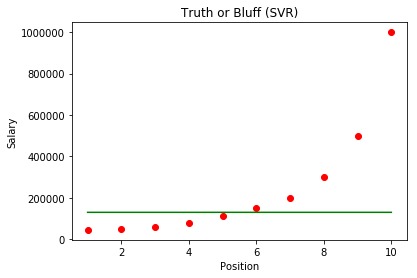

In [12]:
# Visualizing the SVR results 
plt.scatter(X, y, color='red')

# To plot the SVR results 
plt.plot(X, regressor.predict(X), color='green')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

SVR model predicted line is horrible. So what might be going wrong?

**FEATURE SCALING.**

In Polynomial regression we did NOT feature scale (because the linear regression algorithm includes feature scaling).

However, SVR is a less common class and don't have feature scaling in their algorithm. Here we have to do feature scaling separately.

In [13]:
# Include FEATURE SCALING
# Data Preprocessing

# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset=pd.read_csv('Position_Salaries.csv')
print(dataset.head(10))

X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,2:3].values
# Here we want matrix of y for feature scaling

print(X.shape)
print(y.shape)
print('------------------------------------')
print(X[:5]) 
print('------------------------------------')
print(y[:5])

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000
(10, 1)
(10, 1)
------------------------------------
[[1]
 [2]
 [3]
 [4]
 [5]]
------------------------------------
[[ 45000]
 [ 50000]
 [ 60000]
 [ 80000]
 [110000]]


In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

# 2 Objects sc_X, sc_y of StandardScaler class
sc_X = StandardScaler()
sc_y = StandardScaler()

# These objects create new standardized matrix of X and y
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y) 

In [16]:
print(X.shape)
print(y.shape)
print('------------------------------------')
print(X[:5]) 
print('------------------------------------')
print(y[:5])
# Result: Values of X and y changed as it is standarized

(10, 1)
(10, 1)
------------------------------------
[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]]
------------------------------------
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]]


In [17]:
# Fitting SVR to dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf', gamma='auto') 
regressor.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [18]:
# Predicting result
y_pred = regressor.predict(X)
y_pred

array([-0.6197853 , -0.62924694, -0.56788994, -0.49732233, -0.44690338,
       -0.36617206, -0.14115569,  0.28557658,  0.78226531,  1.08559794])

In [21]:
# experience level 6.5
y_pred = regressor.predict(6.5)
y_pred

ValueError: Expected 2D array, got scalar array instead:
array=6.5.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

**Output is a problem because we need an array as input and 6.5 by itself is NOT an array.**

Single brackette `[ ]` wont work here as this will make a vector of 1 element

But we want a matrix and therefore it has to be double brackette `[[ ]]`

In [22]:
y_pred = regressor.predict(np.array([[6.5]]))
y_pred

array([0.01158103])

`y_pred` output previously was 130k, but after applying FeatureScale(), it is giving weird data. This is because, this time SVR regressor is fitted
to the standardized (or transformed) X and y. So when we are asking for `y_pred = regressor.predict(np.array([[6.5]]))`, it is giving weird output as 6.5 is NOT transformed.  

**Solution**: We have to apply `sc_X.transform` to 6.5 to standardize(or transform) 6.5 as well.  We are applying `sc_X` and NOT `sc_y` because 6.5 or the 'level' we are looking for is in the X axis.'

In [23]:
y_pred = regressor.predict(sc_X.transform(np.array([[6.5]])))
y_pred

array([-0.27861589])

In [24]:
# same can be achieved by converting vector to matrix by reshaping the array
y_pred = regressor.predict(sc_X.transform(np.array([6.5]).reshape(1,1)))
y_pred

array([-0.27861589])

STILL we see the output is weird. **Because we are getting predicted salary in scaled form.** Last time we standardized/ scaled 6.5 also, so all are standardized/ scaled. So predicted salary is also scaled here.

**To fix this issue, we need to use inverse transform to get the original scale of salary**

In [25]:
# Inverse transform to get the original scale of salary
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform
                                                  (np.array([[6.5]])))) # experience level 6.5
y_pred

array([170370.0204065])

`sc_y.inverse_transform` because we are predicting salary i.e. y_pred and that corrosponds to dependent variable that's on y axis. We get a decent prediction of 170k. Model is performing much better after standardization

In [ ]:
# Visualizing the SVR results 
plt.scatter(X, y, color='red')

# To plot the SVR results 
plt.plot(X, regressor.predict(X), color='green')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

Red points are real observation points and the green line is made from predicted points

Here we see after **StandardScaler** implementation, **SVR model is fitting much better** to the dataset.
But still the CEO datapoint don't fit that well, that's because it is an outlier

 **We can make the curve smoother by calculating more predicted points between observed points by reducing step size**

(32,)
(32, 1)


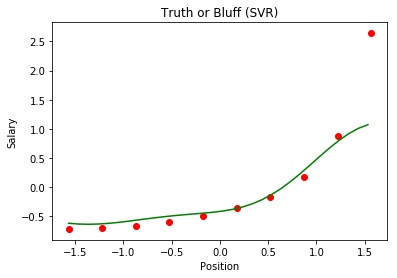

In [26]:
X_grid = np.arange(min(X),max(X),0.1) 
print (X_grid.shape)
# But this will give a vector and for X we want matrix and therefore reshape:
X_grid = X_grid.reshape(len(X_grid),1)
print (X_grid.shape)

# Visualizing the SVR results 
plt.scatter(X, y, color='red')

# To plot the SVR results 
plt.plot(X_grid, regressor.predict(X_grid), color='green')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()